# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

* VIN Charles 21216136
* DELEFOSSE Aymeric 21213744 

# TME 10- LIME / SHAP

<div class="alert alert-block alert-warning">
L'objet de ce TME est de tester les algorithmes LIME et SHAP sur des tâches de classification assez simple.
</div>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%pip install -q lime shap


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
Utiliser le dataset <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a>, comme dans le TME 3 et apprendre dessus un modèle linéaire de régression logistique
</div>

In [60]:
breast_cancer = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=42
)
feature_names = breast_cancer.feature_names
target_names = breast_cancer.target_names

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
(y_pred == y_test).sum() / len(y_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.965034965034965

In [56]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='%lt;U9')

## 2- Explication avec SHAP

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par SHAP.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Exécuter le bloc ci-dessous pour obtenir les explications globales de SHAP. Commentez.
</div>

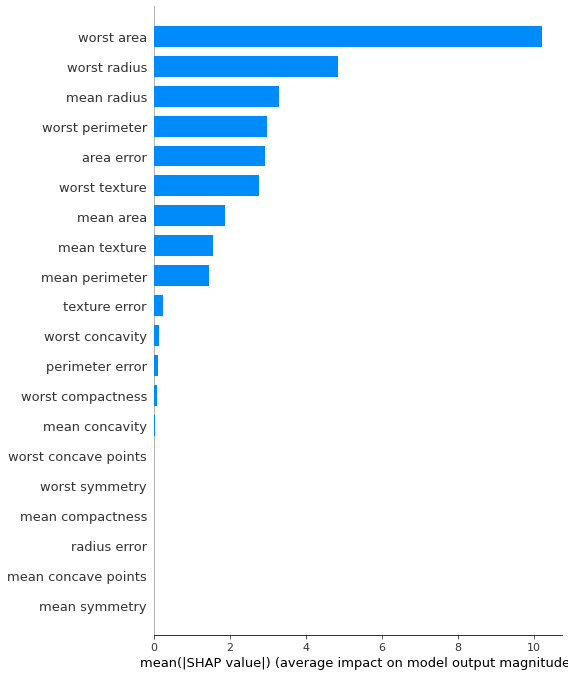

In [114]:
explainer = shap.LinearExplainer(logreg, X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)

> **Commentaire :**
> 
> Pour l'exemple n°1 du dataset de test du Cancer du Sein, nous observons que l'attribut le plus influent dans la classification est le "worst area", suivi de "worst radius". Il est important de noter que cette importance est mesurée en valeur absolue, ce qui ne donne pas d'indication sur l'impact positif ou négatif de l'attribut sur la prédiction.
> 
> Regardons sans la valeurs absolue


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-2.326942,-0.233314,-0.980993,1.427213,-0.000144,0.000178,0.005078,0.001547,-7.047269e-04,-0.000010,...,-1.836949,0.467039,1.358346,5.143430,-0.000885,0.013070,0.017424,0.004099,-0.002398,-0.000191
1,5.157269,0.923650,2.168206,-3.000378,0.000276,0.000792,-0.003094,-0.003631,1.555196e-03,0.000116,...,10.083389,-0.578490,-5.932750,-21.669621,0.000968,0.015753,0.016167,-0.013833,0.007416,0.001117
2,1.131758,0.142379,0.545824,-0.396837,-0.000564,-0.003312,-0.014379,-0.003801,-7.442590e-04,0.000069,...,3.333753,-0.265909,-1.653080,-5.646335,-0.001839,0.012049,-0.070535,-0.007462,0.001354,0.000252
3,-2.407915,-0.626084,-0.952842,1.523540,-0.000397,-0.005279,0.005850,0.002829,4.638442e-05,-0.000110,...,-4.356010,1.399391,2.030568,8.801704,-0.001076,-0.002958,0.038471,0.010540,0.007311,-0.000559
4,-3.402725,-2.009318,-1.458077,1.966914,-0.000152,-0.001133,0.008785,0.003086,2.635478e-07,-0.000066,...,-5.103291,3.140142,3.161027,10.110648,-0.000241,0.029674,0.086063,0.011587,0.012122,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.183219,-1.667779,0.106522,0.265833,-0.000740,-0.005766,-0.000656,-0.002519,-1.963168e-03,-0.000006,...,-0.185699,3.916204,-0.035156,2.306631,0.000300,-0.032332,0.022686,-0.004751,-0.005302,-0.000023
139,-0.036565,0.458303,0.011697,0.328684,-0.000103,-0.002953,-0.006018,-0.001160,-8.694442e-04,-0.000023,...,2.212832,-2.486309,-0.922405,-3.118718,-0.001887,-0.094083,-0.162892,-0.014969,-0.039260,-0.001026
140,-3.981103,-0.988969,-1.734400,2.169814,-0.000498,0.006050,0.019577,0.003229,6.854879e-04,-0.000005,...,-4.922497,-0.503039,3.040987,9.803723,-0.000432,0.070287,0.143393,0.010399,-0.002059,0.000335
141,6.163647,1.282266,2.642327,-3.888493,-0.000085,0.000834,-0.014760,-0.005571,1.555196e-03,0.000125,...,13.048407,-2.895898,-8.114337,-33.675801,-0.001569,-0.036228,-0.194699,-0.027711,0.002817,0.000496


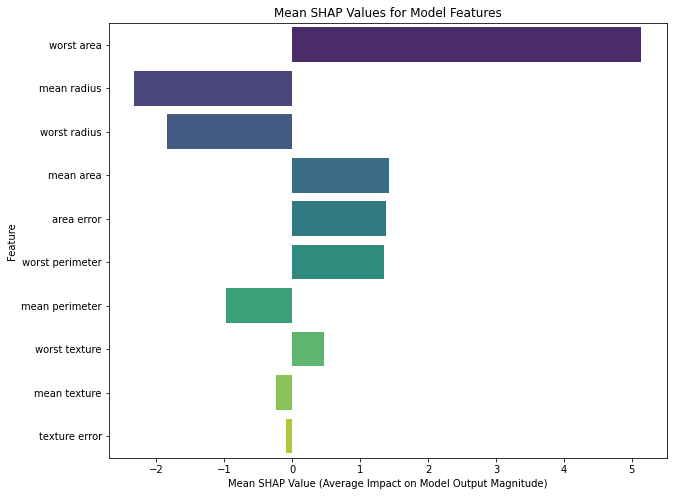

In [78]:
data = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': shap_values[0,:]
})

# Sorting the DataFrame by the SHAP values
data = data.sort_values(by='Mean SHAP Value', ascending=False, key=lambda x: abs(x)).head(10)

# Plotting the graph using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Mean SHAP Value', y='Feature', data=data, palette="viridis")
plt.title('Mean SHAP Values for Model Features')
plt.xlabel('Mean SHAP Value (Average Impact on Model Output Magnitude)')
plt.ylabel('Feature')
shap_plot = plt.gca()

<div class = "alert alert-block alert-info">
    Q2.2 - Exécuter le bloc ci-dessous pour obtenir une explication locale avec SHAP du premier exemple de la base de test. Commentez.
</div>

In [109]:
logreg.predict_proba(X_test[0:1, :])

array([[0.13839962, 0.86160038]])

In [110]:
np.log(0.8616003798329676 / (1 - 0.8616003798329676))

1.8286462679661992

In [111]:
shap_values[0, :].sum()

4.29096165170911

In [115]:
1.83 - explainer.expected_value

4.292315383742911

In [116]:
explainer.expected_value # esperance de f(x)

-2.4623153837429106

divide by zero encountered in divide


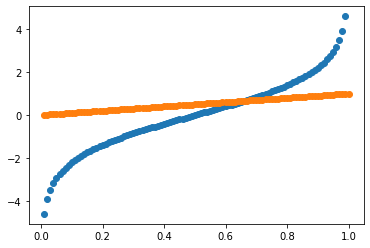

In [122]:
p = np.linspace(1e-2, 1, 100)
plt.scatter(p, np.log(p / (1-p)))
plt.scatter(p, p)

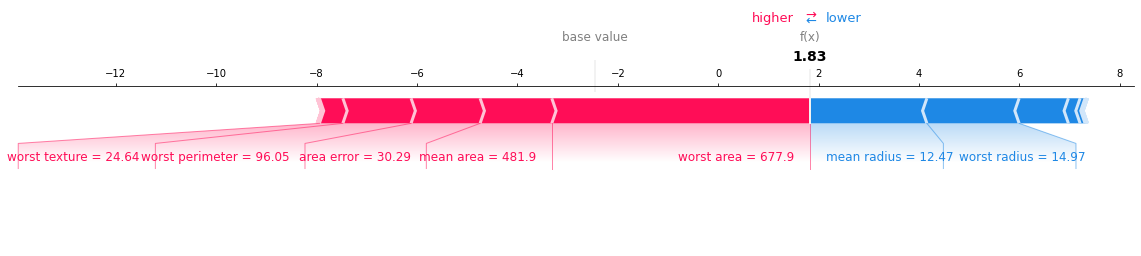

In [50]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X_test[0, :],
    feature_names=feature_names,
    matplotlib=True,
)

**Commentaire :**
Première remarque : le $f(x)$ ne renvoie pas la valeur du classifier, c'est-à-dire une probabilité entre 0 et 1. Ici, SHAP décide d'afficher $f(x) = \log \left(\frac{p}{1-p}\right)$, où $p$ est notre probabilité. Ainsi, on peut percevoir ça comment une mesure d'incertitude, où, plus une valeur est négative, plus on est sûr que la probabilité est proche de 0, et plus la valeur est élevée, plus on est sûr que la probabilité est proche de 1. C'est un premier choix effectué par la bibliothèque, qui requiert de comprendre ce qu'on affiche. Ainsi, ici, on n'est ni sur que le cacner soit malignant ou bénin.

Les barres roses représentent les caractéristiques qui poussent la prédiction vers une valeur inférieure, tandis que les barres bleues représentent les caractéristiques qui poussent la prédiction vers une valeur supérieure.

Les valeurs sont les plus significatives et corresponents aux valeurs des attributs de l'exemple. Ainsi, 

Voici quelques points à noter à partir de cette image:

- "Worst texture", "worst perimeter", et "area error" sont les caractéristiques qui ont le plus grand impact négatif sur la prédiction, car elles contribuent à diminuer la valeur de prédiction du modèle.
- "Mean area" a également un impact négatif modéré.
- D'autre part, "worst area", "mean radius", et "worst radius" sont des caractéristiques qui augmentent la prédiction, comme on le voit par leur couleur bleue et leur position sur le côté droit du graphique.

<div class = "alert alert-block alert-info">
    Q2.3 - Comparer avec l'exemple suivant de la base de test.
</div>

In [133]:
prout = logreg.predict_proba(X_test[1:2, :])

np.log(prout / (1 - prout))

array([[ 20.75637848, -20.75637849]])

In [137]:
np.log(prout / (1 - prout))[0] - explainer.expected_value

array([ 23.21869386, -18.29406311])

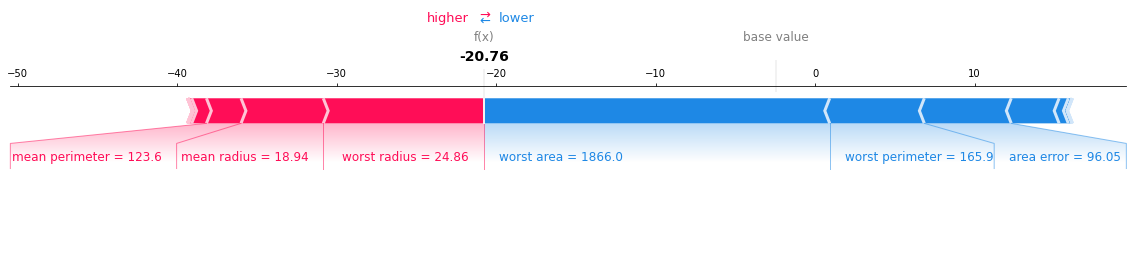

In [51]:
shap.force_plot(
    explainer.expected_value,
    shap_values[1, :],
    X_test[1, :],
    feature_names=feature_names,
    matplotlib=True,
)

suis pas sur de comment ça se lit xptdr

## 3 - Expérimentations

<div class="alert alert-block alert-warning">
    <ul>
        <li> Comparer les résultats fournis par LIME et SHAP sur des données identiques et commenter les résultats</li>
    <li> Examiner les résultats par exemple sur les données half-moons dans un cas où une explication linéaire est inappropriée</li>
    <li> Générer d'autres explications globales avec SHAP</li>
    <li> Modifier votre propre implémentation de LIME pour utiliser le noyau SHAP et comparer au résultat fourni par SHAP [facultatif]</li>
        </ul>
</div>

TypeError: TypeError: 'Text' object is not callable

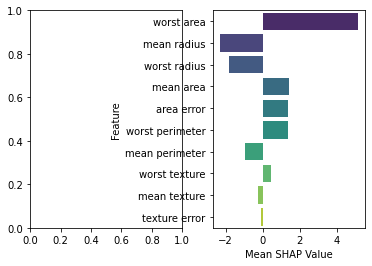

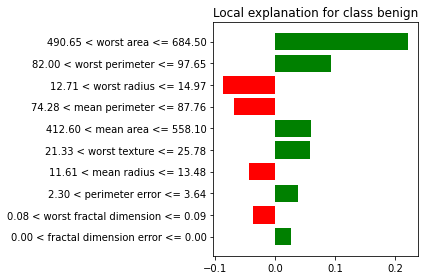

In [101]:
explainer_lime = LimeTabularExplainer(
    X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode="classification",
)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

exp = explainer_lime.explain_instance(X_test[0], logreg.predict_proba, num_features=10)
exp.as_list()
exp.as_pyplot_figure()

sns.barplot(x='Mean SHAP Value', y='Feature', data=data, palette="viridis", ax=ax2)
ax2.title('Mean SHAP Values for Model Features')
ax2.xlabel('Mean SHAP Value (Average Impact on Model Output Magnitude)')
ax2.ylabel('Feature')

In [97]:

lime_plot(ax1)
shap_plot(ax2)
plt.show()

TypeError: TypeError: 'Axes' object is not callable

## 4 - Données textuelles [facultatif]

<div class="alert alert-block alert-warning">
    Apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME et SHAP pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

<div class = "alert alert-block alert-info">
Utilisez LIME et SHAP pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>